<a href="https://colab.research.google.com/github/Hokaid/DeepLearning-and-the-Higgs-Boson/blob/main/DeepLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Students***

- ***Geral Esteen Castillo Arredondo (U201716913)***

- ***Arian Yturrizaga
(U201716372)***

- ***Franco Moloche (U201715100)***

#***I. Reading and Description of the data***


##***1. Data reading***


In the following code cells, the respective data set is read from google drive. The corresponding file to be read has the name ***training.csv***. 

In [ ]:
#Read a CSV
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
import numpy as np
from google.colab import data_table

link_google_drive = 'https://drive.google.com/open?id=1skak0UEfIhU3GkDl7V7hTyIaxDb-KMQ-'
flu, id = link_google_drive.split('=')
dataset = drive.CreateFile({'id':id})
dataset.GetContentFile('training.csv')
df = pd.read_csv('training.csv')
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


##***2. Description of the dataset***

***Dataset context:*** The dataset is about detection of the Higgs Boson in simulated data in order to reproduce the behavior of the ATLAS experience. This is a binary classification problem, or event detection. Now, we will proceed to define the class or objective attribute: 

* ***Label:*** It indicates ***s*** when the class is ***tau tau decay of a Higgs boson***. If it indicates ***b***, means that the class is ***Background***. 

#***II. Data preprocessing***


##***1. Cleaning and data processing***

###***A. Elimination of duplicated data***

Redundant data that can be found in the data must be eliminated, since having duplicated data does not represent any gain in information. The following code is used to eliminate duplicated data.

In [ ]:
#Eliminate duplicated data
df = df.drop_duplicates()

Now, it will be checked that there are no duplicate records with the following code, which prints the number of duplicate records in the data set.  

In [ ]:
#identificar si hay valores duplicados
ddf = df.duplicated()
n_vdupli = 0 #numeros de valores duplicados
for i in range(len(ddf)):
  if (ddf[i] == True):
    n_vdupli += 1
print(n_vdupli)

0


###***B. Treatment of missing values***

The missing values ​​are then printed for each column. In this case, we can identify that there are no missing values ​​in the data set.

***Conclusion: it was not possible to identify null values ​​in the given data.***

In [ ]:
 print("number of records: ", len(df))
 df.isnull().sum()

number of records:  250000


EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

###***C. Transformation of categorical data***

The ***Label*** column, which is the class column of the dataset, was represented in a categorical way. What had to be done was to transform it to numeric, so that it can be used by the model chosen later. Most learning models only understand numerical data. In that sense, it is appropriate to code the categorical variables of the data set. Then the specified is done. The first 5 instances of the data set are printed with the categorical variables coded to numbers.

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Codificando todas las variables categoricas, ya que los clasificadores solo entienden datos numericos
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,0
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,0
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,0
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,0


###***D. Data reduction***

It was analyzed that the column ***EventId*** was basically the ID for each record, and it was considered irrelevant to work the model, so this column was discarded.

In [ ]:
#dropped the eventid column because it's irrelevant
df = df.drop(["EventId"], axis = 1)

df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,0


##***2. Data transformation***

###***A. Standardization application***

Due to, after having analyzed the columns in detail, the realizaction that the values had different scales, it was decided to use the standardization technique so that the dataframe could have coherence, and the model, when training, does not get confused because some values they weigh more than others.

In [ ]:
#Standarize
dfx = df.iloc[:,:-1]
dfx=(dfx-dfx.mean())/dfx.std()
dfx.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
0,0.461413,0.068332,0.407679,-0.469965,1.560750,1.103311,1.571725,0.882476,1.033096,0.339894,0.170928,1.277081,1.563471,-0.270810,0.846710,0.214211,0.225054,1.812284,-1.352817,-0.756755,-0.147267,0.386846,1.044400,0.780101,0.820300,0.816832,1.538822,1.566797,1.558581,0.412510,-0.876813
1,0.516703,0.552504,0.540135,-0.153167,-0.639366,-0.604528,-0.639361,1.404885,-0.756026,-0.287584,-0.661277,1.292162,-0.639367,0.147536,1.688501,-1.652846,-0.441525,0.411474,0.032730,0.090798,-1.051681,-0.357718,0.021305,0.740306,0.817388,0.818292,-0.638955,-0.639365,-0.639366,-0.273819,0.312952
2,-2.337854,3.195149,1.096558,-0.349709,-0.639366,-0.604528,-0.639361,0.989768,-0.430167,0.340360,2.768168,1.292162,-0.639367,-0.292406,-0.571649,-1.147551,3.387675,-0.737949,0.555131,0.382000,-1.200670,0.400135,0.021305,0.736600,0.820102,0.811781,-0.638955,-0.639365,-0.639366,-0.293969,0.373644
3,0.474788,0.910377,-0.005853,-0.903014,-0.639366,-0.604528,-0.639361,1.196688,-0.830733,-0.712704,1.084816,-0.969093,-0.639367,-0.716597,-1.354135,0.010002,0.301872,-0.397233,-1.730443,-0.323312,0.038692,-0.978148,-1.001790,-1.220855,-1.225626,-1.225626,-0.638955,-0.639365,-0.639366,-0.745438,2.026347
4,0.553438,-0.914554,1.313366,-0.651803,-0.639366,-0.604528,-0.639361,1.938790,-0.112795,-0.868141,-0.451746,-1.052875,-0.639367,-0.468427,-1.800565,-1.223511,-0.765296,0.646260,0.839727,-1.185426,-0.475041,-1.238473,-1.001790,-1.220855,-1.225626,-1.225626,-0.638955,-0.639365,-0.639366,-0.745438,2.452433


##***3. Feature Selection***

###***A. Principal Component Analysis (PCA) application***

It was also possible to analyze that the dataset contained several columns, that is, it had a high dimension. To deal with this, it was decided to apply Principle Component Analysis (PCA). This reduces the dataset to fewer columns so that the model is not too complicated to train. In this case, we consider to get 15 principle components. 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pcomp = pca.fit_transform(dfx)

pcadf = pd.DataFrame(data = pcomp)
pcadf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.909106,0.578580,-1.807047,-1.797587,-0.675406,1.755921,1.133940,-0.102496,-0.364727,1.106631,-0.720947,-0.239374,0.683197,-0.667598,0.761884
1,-1.002433,-1.702615,0.645995,-1.287503,-0.579928,1.387507,-1.224460,-1.289892,-1.152271,0.111834,-0.957205,1.354163,0.002844,-0.684504,-0.800538
2,-0.727750,2.635592,4.314479,-1.770568,-1.889024,-1.136834,-1.324711,-1.528420,-1.087185,-0.232950,-0.230793,0.020733,1.886853,-1.489323,0.051157
3,-3.763644,1.936254,-0.095562,-0.815837,-0.026251,-1.256957,1.232349,0.575441,-0.223774,-0.473996,-1.202835,0.573624,-0.948401,0.155328,0.704654
4,-3.963918,0.526049,-1.394823,-1.491979,1.316625,-0.677281,-1.432062,0.235733,-0.468412,0.348293,-0.173563,1.061484,-1.878576,0.025525,1.805419


In the following code, we are adding the class column ***Label*** in the dataset where we apply the feature selection. In that way, we can have the principal components obtained and the class column ***Label*** in one dataset.

In [ ]:
ofidf = pcadf
ofidf["Label"] = df["Label"].values
ofidf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Label
0,3.909106,0.578580,-1.807047,-1.797587,-0.675406,1.755921,1.133940,-0.102496,-0.364727,1.106631,-0.720947,-0.239374,0.683197,-0.667598,0.761884,1
1,-1.002433,-1.702615,0.645995,-1.287503,-0.579928,1.387507,-1.224460,-1.289892,-1.152271,0.111834,-0.957205,1.354163,0.002844,-0.684504,-0.800538,0
2,-0.727750,2.635592,4.314479,-1.770568,-1.889024,-1.136834,-1.324711,-1.528420,-1.087185,-0.232950,-0.230793,0.020733,1.886853,-1.489323,0.051157,0
3,-3.763644,1.936254,-0.095562,-0.815837,-0.026251,-1.256957,1.232349,0.575441,-0.223774,-0.473996,-1.202835,0.573624,-0.948401,0.155328,0.704654,0
4,-3.963918,0.526049,-1.394823,-1.491979,1.316625,-0.677281,-1.432062,0.235733,-0.468412,0.348293,-0.173563,1.061484,-1.878576,0.025525,1.805419,0


#***III. Test with a Deep Learning model***

First of all, the columns for training were separated from the class columns, to be able to pass them to the model.

In [ ]:
X = ofidf.iloc[:,0:-1]
y = ofidf.iloc[:,-1]

In this case, we going to import ***keras*** from ***TensorFlow*** to use a ***Deep Learning*** model. 

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

##***1. Technique application***

***Approach:*** In this part a Deep Learning model is developed. Regarding its architecture, this model contains 5 layers. First, it must be defined why the application of models of this type in learning problems is important. Deep Learning models are basically neural networks that are characterized by containing a large number of layers or neurons. For this reason, they are considered deep learning models. The importance of its use is based on the great ability of this type of algorithm to offer results comparable to those of a human expert. 



In the following code, the described model is implemented.

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=15, activation='linear'))
model.add(Dense(16, activation='linear'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=1/30)
model.compile(optimizer="adagrad", loss='mse', metrics=["accuracy"])

Now, the model is trained according to the code specified in the next cell.

In [ ]:
history = model.fit(X, y, validation_split=0.3, epochs=500, verbose=1, batch_size=512)

Epoch 1/500
342/342 [==============================] - 1s 2ms/step - loss: 0.2094 - accuracy: 0.6905 - val_loss: 0.1934 - val_accuracy: 0.7180
Epoch 2/500
342/342 [==============================] - 1s 2ms/step - loss: 0.1818 - accuracy: 0.7395 - val_loss: 0.1717 - val_accuracy: 0.7567
Epoch 3/500
342/342 [==============================] - 1s 2ms/step - loss: 0.1622 - accuracy: 0.7747 - val_loss: 0.1537 - val_accuracy: 0.7901
Epoch 4/500
342/342 [==============================] - 1s 2ms/step - loss: 0.1454 - accuracy: 0.8061 - val_loss: 0.1382 - val_accuracy: 0.8196
Epoch 5/500
342/342 [==============================] - 1s 2ms/step - loss: 0.1309 - accuracy: 0.8337 - val_loss: 0.1248 - val_accuracy: 0.8445
Epoch 6/500
342/342 [==============================] - 1s 2ms/step - loss: 0.1184 - accuracy: 0.8564 - val_loss: 0.1133 - val_accuracy: 0.8653
Epoch 7/500
342/342 [==============================] - 1s 2ms/step - loss: 0.1077 - accuracy: 0.8754 - val_loss: 0.1036 - val_accuracy: 0.8817

##***2. Results and Conclusion***

Two plots are shown, which have the objective of representing the results obtained regarding the training process and the testing process.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


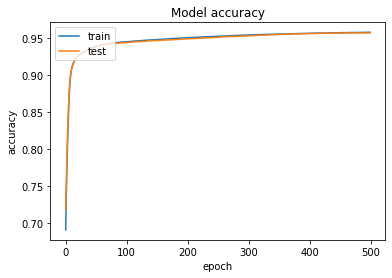

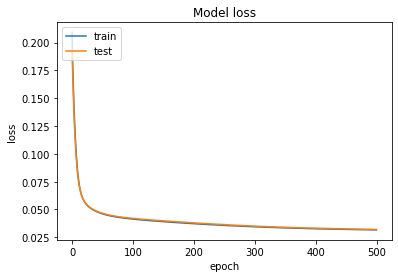

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

***Results:*** In the first plot, you can see the increasing tendency of the accuracy both in the training process and in the testing process. It is observed that the tendency of the accuracy is the same for each specified process. In that sense, it is established that there is no overfitting. Similarly, the accuracy reaches values higher than ***95%***. In the second plot, the decreasing tendency of the loss is observed. In this case, as can be seen in the plot, the loss in training has the same behavior as the loss in the test. In addition, loss values lower than ***4%*** are achieved

***Conclusion:*** In short, it was possible to read and describe the data respectively. In this case, the data deals with the detection of the Higgs Boson in simulated data to reproduce the behavior of the ATLAS experience. The data was preprocessed using cleaning, transformation and feature selection. In that sense, the application of a deep learning model was possible. Exceptional results were obtained with an accuracy greater than ***95%*** and a loss less than ***4%***.